<a href="https://colab.research.google.com/github/Alejandro3009/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Algoritmo Quick Sort**

#1. Descripción del problema

Un problema de ordenamiento de un conjunto de números

Entrada: una secuencia de números $[a_1,a_2,a_3,...,a_n]$

Salida: una permutación de la misma secuencia de números $[a_1,a_2,a_3,...,a_n]$ de tal forma que estos $a_1'\leq a_2'\leq a_3' \leq... \leq a_n'$.



#2. descripcion del algortimo

El algortimo **quick sort** es un algoritmo que funciona en base al paradigma **divide y venceras** y **la recursividad**.

* ***Recursividad*:** la recursividad es una manera alternativa a las iteraciones, en este método nosotros realizamos un mismo procedimiento $X$ cantidad de veces hasta llegar a un punto deseado, en ese punto empezamos a devolvernos y a resolver el problema. 

* ***Divides y venceras*:** la idea del paradigma reside en la idea de que al reducir el tamaño del problema este se vuelve más fácil de resolver, para luego volver en nuestros pasos hasta llegar al problema original.

Este algoritmo implementa una funcion escencial para su funcionamiento la cual se llama **Partition**, la funcion **Partition** lo que hace es ordenar el arreglo en base a un pivote en dos sub-arreglos dentro del arreglo, el sub-arreglo izquierdo van a ser todos los elementos menores a el pivote y el sub-arreglo derecho son todos los elementos mayores al pivote.

Esto es esencial ya que una vez el arreglo esta ordenado, el arreglo se ordena mientras este se va sub-dividiendo, esto ahorra tiempo en la ejecucion del algoritmo, a continuacion se mostrar la implementacion del codigo

In [28]:
import random
from termcolor import colored
import copy

def partition(A,posPivote,contador,Verbose):
  piv = A[posPivote]
  if(Verbose):
    print("el pivote es: ",piv)
    print("el arreglo con el que se va a trabajar: ",A)
  
  longitud = len(A)
  i = -1
  j = 0
  aux = 0

  for j in range(0,longitud):
    if(j == posPivote):
      contador+=1
      continue
    elif(A[j] <= piv):
      i += 1
      if(i == posPivote):
        contador+=1
        i += 1
      aux = A[i]
      A[i] = A[j]
      A[j] = aux
      contador+=1

  if(Verbose):
    print("sub-arreglo de los elementos menores al pivote: ",A[0:i+1])
    print("sub-arreglo de los elementos mayores al pivote: ",A[i+1:],"\n")

  if(posPivote <= i):
    aux = A[i]
    A[i] = A[posPivote]
    A[posPivote] = aux
    contador+=1
    return A,i,contador
  else:
    aux = A[i+1]
    A[i+1] = A[posPivote]
    A[posPivote] = aux
    contador+=1
    return A,i+1,contador

def mediana(A,contador,Verbose):
  if(len(A) > 3):
    elementos = random.sample(range(0,len(A)-1),3)
  else:
    return 0,contador
  
  if(Verbose):
    print("elementos con los que se van a sacar la mediana")
    for i in range(0,3):
      print(i+1,"-",A[elementos[i]])
  
  i = 1
  menor = A[elementos[0]]
  indiceMenor = 0
  while(i <= 2):
    if(A[elementos[i]] < menor):
      menor = A[elementos[i]]
      indiceMenor = i
    i+=1
    contador+=1

  if(elementos[indiceMenor] != elementos[1]):
    aux = elementos[indiceMenor]
    elementos[indiceMenor] = elementos[1]
    elementos[1] = aux  
    indiceMenor = 1

  if(A[elementos[indiceMenor-1]] < A[elementos[indiceMenor+1]]):
    if(Verbose):
      print("La mediana es: ",A[elementos[indiceMenor-1]],"\n")
    return elementos[indiceMenor-1],contador+1
  else:
    if(Verbose):
      print("La mediana es: ",A[elementos[indiceMenor+1]],"\n")
    return elementos[indiceMenor+1],contador+1
  

def quickSort(A,opcion,contador,Verbose = False):
  if(len(A) <= 1):
    if(Verbose):
      print("se llego al caso base, asi que ahora se empieza reconstruir el arreglo \n")
    return A,contador
  else:
    if(opcion == 1):
      posPivote = 0
    elif(opcion == 2):
      posPivote,contador = mediana(A,contador,Verbose)
    elif(opcion == 3):
      posPivote = len(A)-1

    A,posPivote,contador = partition(A,posPivote,contador,Verbose)
    B,contador = quickSort(A[0:posPivote],opcion,contador,Verbose)
    C,contador = quickSort(A[posPivote+1:len(A)],opcion,contador,Verbose)

  i = len(B)
  j = 0
  if(Verbose):
    print("ahora se uniran los sub-arreglos izquierdo y derecho")
    print("Sub-arreglo izquierdo: ",B)
    print("Sub-arreglo derecho: ",C,"\n")
  
  for k in range(0,len(A)):
    if(j == i):
      j = 0
      i = -1
    elif(i > -1):
      A[k] = B[j]
      j += 1
    elif(i == -1):
      A[k] = C[j]
      j += 1

  if(Verbose):
    print("ahora el arreglo esta trivialmente arreglado, asi que se devuelve para que pueda terminar de ordenarse")
    print("arreglo trivialmente ordenado: ",A,"\n")
  return A,contador


a = random.sample(range(1,50),10)
print("arreglo de entrada: ",a)
a,c  = quickSort(a,3,0)
print("arreglo de salida: ",a)
print("cantidad de comparaciones: ",c)

arreglo de entrada:  [45, 25, 34, 4, 16, 44, 12, 5, 36, 48]
arreglo de salida:  [4, 5, 12, 16, 25, 34, 36, 44, 45, 48]
cantidad de comparaciones:  35


Esta ejecucion del codigo utilizo esta utilizando la opcion de usar un pivote que siempre este al final del arreglo, dependiendo del valor de opcion:

* El pivote se posiciona al inicio del arreglo, con $Opcion = 1$
* El pivote se posiciona segun la mediana de tres valores aleatorios del arreglo, con $Opcion = 2$
* El pivote se posiciona al final del arreglo, con $Opcion = 3$

##2.2. Ejemplo

Para ordenar el siguiente arreglo ($A$) utilizando el pivote al final:

$[8,2,6,4]$

En la primera recusion del arreglo este se va a dividir en dos sub-arreglos de tamaño 2, el sub-arreglo izquierdo va a ser menor a 2 (el pivote) y el sub-arreglo derecho mayor a 2. 

$[8,2,6,4]$ -> $[2,4]$ , $[8,6]$

En la segunda recusion los dos sub-arreglos se van a dividir en cuatro sub arreglos de tamaño 1, y se utilizaran dos pivotes, para el sub-arreglo izquierdo sera 4 y para el derecho sera el 6

$[2,4]$ | $[8,6]$ -> $[2]$ , $[4]$ | $[6]$ , $[8]$

En la tercera recusion ya que todos los sub-arreglos son de tamaño 1, ahora se uniran entre ellos, y formarán dos nuevos sub-arreglos de tamaño 2.

$[2]$ , $[4]$ | $[6]$ , $[8]$ -> $[2]$ $U$ $[4]$ | $[6]$ $U$ $[8]$ -> $[2',4']$ | $[6',8']$

En la cuarta recusion se uniran los dos sub-arreglos para obtener el arreglo $A'$, el cual tiene los mismos elementos que el arreglo $A$ pero ordenados.

$[2',4']$ | $[6',8']$ -> $[2',4']$ $U$ $[6',8']$ -> $[2',4',6',8']$

Como se puede ver en el ejemplo el arreglo, a medida se divide el arreglo este va quedando ordenado, por lo tanto un vez se llega a un sub-arreglo de tamaño 1 solo tiene que unir los sub-arreglos. 

##2.4. Ejecución del algoritmo paso a paso (verbose=True)

A continuacion hay otra ejecucion del codigo esta vez mostrando el paso a paso de este, tambien se ejecutara un paso a paso para los tres valores que puede tener el pivote, esta opcion se habilita cuando $verbose = True$.

###2.4.1. Paso a paso con pivote al inicio del arreglo

In [36]:
a = random.sample(range(1,20),6)
print("arreglo de entrada: ",a)
a,c  = quickSort(a,1,0,True)
print("arreglo de salida: ",a)
print("cantidad de comparaciones: ",c)

arreglo de entrada:  [1, 4, 19, 6, 14, 11]
el pivote es:  1
el arreglo con el que se va a trabajar:  [1, 4, 19, 6, 14, 11]
sub-arreglo de los elementos menores al pivote:  []
sub-arreglo de los elementos mayores al pivote:  [1, 4, 19, 6, 14, 11] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

el pivote es:  4
el arreglo con el que se va a trabajar:  [4, 19, 6, 14, 11]
sub-arreglo de los elementos menores al pivote:  []
sub-arreglo de los elementos mayores al pivote:  [4, 19, 6, 14, 11] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

el pivote es:  19
el arreglo con el que se va a trabajar:  [19, 6, 14, 11]
sub-arreglo de los elementos menores al pivote:  [19, 6, 14, 11]
sub-arreglo de los elementos mayores al pivote:  [] 

el pivote es:  11
el arreglo con el que se va a trabajar:  [11, 6, 14]
sub-arreglo de los elementos menores al pivote:  [11, 6]
sub-arreglo de los elementos mayores al pivote:  [14] 

se llego al caso base, asi qu

###2.4.2. Paso a paso con pivote siendo la mediana de tres valores del arreglo

In [37]:
a = random.sample(range(1,20),6)
print("arreglo de entrada: ",a)
a,c  = quickSort(a,2,0,True)
print("arreglo de salida: ",a)
print("cantidad de comparaciones: ",c)

arreglo de entrada:  [8, 7, 19, 2, 14, 12]
elementos con los que se van a sacar la mediana
1 - 2
2 - 7
3 - 19
La mediana es:  7 

el pivote es:  7
el arreglo con el que se va a trabajar:  [8, 7, 19, 2, 14, 12]
sub-arreglo de los elementos menores al pivote:  [2]
sub-arreglo de los elementos mayores al pivote:  [7, 19, 8, 14, 12] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

elementos con los que se van a sacar la mediana
1 - 19
2 - 8
3 - 14
La mediana es:  14 

el pivote es:  14
el arreglo con el que se va a trabajar:  [19, 8, 14, 12]
sub-arreglo de los elementos menores al pivote:  [8, 12]
sub-arreglo de los elementos mayores al pivote:  [14, 19] 

el pivote es:  8
el arreglo con el que se va a trabajar:  [8, 12]
sub-arreglo de los elementos menores al pivote:  []
sub-arreglo de los elementos mayores al pivote:  [8, 12] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

se llego al caso base, asi que ahora se empieza reconstruir el 

###2.4.3. Paso a paso con pivote al final del arreglo

In [38]:
a = random.sample(range(1,20),6)
print("arreglo de entrada: ",a)
a,c  = quickSort(a,3,0,True)
print("arreglo de salida: ",a)
print("cantidad de comparaciones: ",c)

arreglo de entrada:  [16, 15, 8, 18, 17, 3]
el pivote es:  3
el arreglo con el que se va a trabajar:  [16, 15, 8, 18, 17, 3]
sub-arreglo de los elementos menores al pivote:  []
sub-arreglo de los elementos mayores al pivote:  [16, 15, 8, 18, 17, 3] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

el pivote es:  16
el arreglo con el que se va a trabajar:  [15, 8, 18, 17, 16]
sub-arreglo de los elementos menores al pivote:  [15, 8]
sub-arreglo de los elementos mayores al pivote:  [18, 17, 16] 

el pivote es:  8
el arreglo con el que se va a trabajar:  [15, 8]
sub-arreglo de los elementos menores al pivote:  []
sub-arreglo de los elementos mayores al pivote:  [15, 8] 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

se llego al caso base, asi que ahora se empieza reconstruir el arreglo 

ahora se uniran los sub-arreglos izquierdo y derecho
Sub-arreglo izquierdo:  []
Sub-arreglo derecho:  [15] 

ahora el arreglo esta trivialmente arreglado

# 3. Tiempo de de ejecucción
El algoritmo Quicksort tiene una complejidad temporal en el mejor y el caso promedio de $O(nlogn)$, esto es debido a que recursivamente este va dividiendo en sub-arreglos y luego los recorre para ordenarlos. En el peor caso la complejidad temporal sube a $O(n^2)$, esto es debido a que el arreglo original entregado se encontraba en su mayoría ya ordenado y el pivote se encuentra en el dato mayor, en otras palabras, en la posición más a la derecha.

La función de recurrencia que representa el QuickSort cuando se encuentra balanceado es la siguiente: 

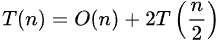


#5. Experimentos

Ahora realizaremos un numero de experimentos que nos ayudaran a visualizar la eficacia del **Quick Sort** en ciertos aspectos.

##5.1. Numero de comparaciones

En este experimento se comprobara el numero de comparaciones que el **Quick Sort** necesita realizar para poder ordenar una lista en su totailidad.

Para ello se hizo una grafica en la que se muestra.

* La cantidad de comparaciones del peor caso calculadas matemáticamente ($n^2$ comparaciones si se forma un arbol desbalanceado)
* La cantidad de comparaciones del mejor caso calculadas matemáticamente ($n*log(n)$ comparaciones si se forma un arbol balanceado)
* La cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para un problema que tiene un tamaño $n \in [5,20]$

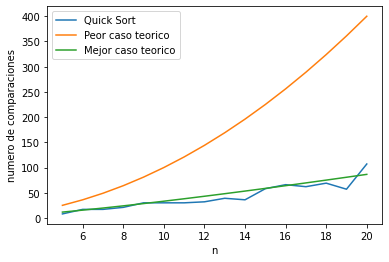

In [39]:
import matplotlib.pyplot as plt
import math
import random

x=[n for n in range(5,21)] 
y1=[n*n for n in range(5,21)] # Peor caso
y2=[n*math.log2(n) for n in range(5,21)] # Mejor caso
y=[]; 

for n in range(5,21):
  a = random.sample(range(1, 100), n)
  a,counter = quickSort(a,1,0)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Quick Sort", "Peor caso teorico", "Mejor caso teorico"])

plt.xlabel('n')
plt.ylabel('numero de comparaciones')
plt.show()

###Análisis de resultados

Como se puede apreciar en el gráfico, el número de comparaciones que realiza en promedio el algoritmo oscila alrededor del mejor caso, esto era de esperarse ya que el **Quick Sort** tiene una implementacion similar a la del **Merge Sort** el cual tiene el mismo comportamiento.

##5.2. Rendimiento segun el pivote

En este experimento se probara si el rendimiento del algoritmo **Quick Sort** se ve afectado segun la posicion donde se coloque el pivote.

* La cantidad de comparaciones que el **Quick Sort** con el pivote al inicio realiza (la gráfica azul)
* La cantidad de comparaciones que el **Quick Sort** con el pivote en la mediana realiza (la gráfica naranja)
* La cantidad de comparaciones que el **Quick Sort** con el pivote al final realiza (la gráfica verde)

para un problema que tiene un tamaño $n \in [5,50]$

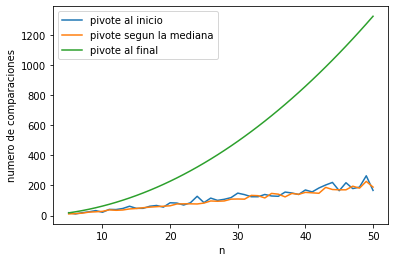

In [40]:
import matplotlib.pyplot as plt
import math

x=[n for n in range(5,51)] 
y1=[] # pivote al inicio
y2=[] # pivote segun la mediana
y3=[] # pivote al final

for n in range(5,51):
  a = random.sample(range(1, 100), n)
  a,counter = quickSort(a,1,0)
  y1.append(counter)

  a,counter = quickSort(a,2,0)
  y2.append(counter)

  a,counter = quickSort(a,3,0)
  y3.append(counter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["pivote al inicio", "pivote segun la mediana", "pivote al final"])

plt.xlabel('n')
plt.ylabel('numero de comparaciones')
plt.show()

Como se puede observar en la grafica, al el pivote al inicio o en la mediana no va a afectar el rendimiento del algoritmo a lo largo de su ejecucion, y esto deberia ser cierto al colocar el pivote al final.

Por algun motivo este tiene un crecimiento exponencial, se desconoce el motivo de este comportamiento.

##5.3. Comparacion entre algoritmos

En este experimento se compararán dos algoritmos recusivos el **Quick Sort** y el **Merge Sort**, en especifico se comparara el numero de comparaciones que realizan ambos algoritmos. Tambien se comparara el **Quick Sort** con los pivotes al inicio, en la mediana y al final

Para ello se hizo una gráfica en la que se muestra.

* La cantidad de comparaciones que el **Quick Sort** con el pivote al inicio realiza (la gráfica azul)
* La cantidad de comparaciones que el **Quick Sort** con el pivote en la mediana realiza (la gráfica naranja)
* La cantidad de comparaciones que el **Quick Sort** con el pivote al final realiza (la gráfica verde)
* La cantidad de comparaciones que el **Merge Sort** realiza (la gráfica roja).

para un problema que tiene un tamaño $n \in [5,50]$

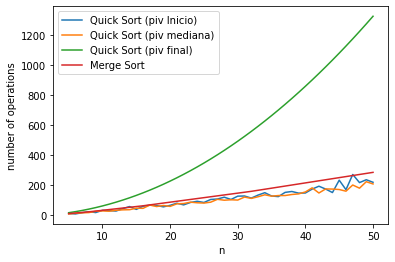

In [35]:
import matplotlib.pyplot as plt

x=[n for n in range(5,51)] 
y1=[]; 
y2=[];
y3=[];
y4=[];

for n in range(5,51):
  a = random.sample(range(1, 100), n)
  a,counter = quickSort(a,1,0)
  y1.append(counter)

  a,counter = quickSort(a,2,0)
  y2.append(counter)

  a,counter = quickSort(a,3,0)
  y3.append(counter)

  a,counter = Merge_Sort(a)
  y4.append(counter)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)
plt.legend(["Quick Sort (piv Inicio)","Quick Sort (piv mediana)","Quick Sort (piv final)", "Merge Sort"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

Como se puede observar en la grafica, el **Quick Sort** con sus pivotes al inicio y en la mediana resultan ser ligeramente mas eficientes que el **Merge Sort**, pero al colocar el pivote al final el **Quick Sort** resulta ser drasticamente mas ineficiente que el **Merge Sort**, esto no debiese ser asi.

Al igual que en el experimento anterior, por algun motivo este tiene un crecimiento exponencial, se desconoce el motivo de este comportamiento.

#6. Anexos

##6.1. Códigos para las presentaciones graficas

A continuación, puede ver el código del algoritmo **Merge Sort**, esta implementacion del **Merge Sort** es necesaria para hacer la gráfica mostrada en el punto 5.3.

In [5]:
import random
from termcolor import colored
import copy

def Merge (A,B,cont,verbose):
  n = len(A)
  k = len(B)
  C = random.sample(range(0,(n+k)+1),n+k)
  indiceA = 0
  indiceB = 0
  indiceC = 0

  while(indiceC != (n+k)):

    if(verbose and indiceA != n and indiceB != k):
      print("comparando")
      print("arreglo a: ", colored(f"{str(A[indiceA:indiceA+1])[1:-1]}","red"),",",str(A[indiceA+1:])[1:-1], " arreglo b: ",colored(f"{str(B[indiceB:indiceB+1])[1:-1]}","red"),",",str(B[indiceB+1:])[1:-1])

    if(indiceA == n):
      C[indiceC] = B[indiceB]
      indiceC += 1
      indiceB += 1
      cont += 1
    elif(indiceB == k):
      C[indiceC] = A[indiceA]
      indiceC += 1
      indiceA += 1
      cont +=1
    elif(A[indiceA] <= B[indiceB]):
      if(verbose):
        print("el numero menor es: ", str(A[indiceA]), "asi que se guarda en C \n")
      C[indiceC] = A[indiceA]
      indiceC += 1
      indiceA += 1
      cont += 1
    else:
      if(verbose):
        print("el numero menor es: ", (B[indiceB]), "asi que se guarda en C \n")
      C[indiceC] = B[indiceB]
      indiceC += 1
      indiceB += 1
      cont += 1
  
  if(verbose):
    print("estado actual del arreglo C")
    print(colored(f"{str(C)[1:-1]}","blue"),"\n")
  
  return C,cont

def Merge_Sort (Arreglo,verbose = False):
  n = len(Arreglo)
  cont = 0
  if(n == 1):
    if(verbose):
      print("tamaño actual: ", n)
      print("se llego a un punto en que todos los sub-arreglos ahora son de tamaño 1 \n")
    return Arreglo,cont
  
  n = int(n/2)
  if(verbose):
    print("tamaño actual: ", n)
    print("como el tamaño de los sub-arreglos sigue siendo mayor a uno volvemos a dividirlos en dos \n")
  subArreglo1,contA = Merge_Sort(Arreglo[:n],verbose)
  subArreglo2,contB = Merge_Sort(Arreglo[n:],verbose)

  cont = contA + contB
  Arreglo,cont = Merge(subArreglo1,subArreglo2,cont,verbose)
  return Arreglo,cont